In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys


df = pd.read_csv('athlete_events.csv')
dr = pd.read_csv('rd1.csv')	
# print(df)

ds = pd.read_csv('summer.csv')
#print(ds)


ds = pd.concat([ds,pd.get_dummies(df.Medal)],axis=1)
ds['allmedals']= ds['Bronze'] + ds['Gold'] + ds['Silver'] 


In [82]:

y = ds[ds.Year == 2016]
y

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
34,22.0,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016.0,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,0,0,0,0
77,51.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,0,0,0,0
78,51.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,0,1,0,1
79,51.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,0,1,0,1
80,51.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,0,0,0,0
81,51.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,NaN,0,0,0,0
82,51.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,0,0,0,0
86,55.0,Antonio Abadia Beci,M,26.0,170.0,65.0,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",NaN,0,0,1,1
96,62.0,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016.0,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,0,0,0,0
99,65.0,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016.0,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,0,0,0,0


In [83]:
host_city = y['City'].unique()
host_city


array(['Rio de Janeiro'], dtype=object)

In [84]:

n_sports = y['Sport'].nunique()
n_sports

34

In [85]:
n_events = y['Event'].nunique()
n_events

306

In [86]:
n_parts = y['Name'].nunique()
n_parts

11174

In [87]:

noc = y.groupby(['Team'], as_index = True).agg({'Medal':'count'})
maxmedals = noc.sort_values(['Medal'], ascending = False)
maxmedals = maxmedals.reset_index()
top_c = maxmedals.head(5)
top_c


,Team,Medal
0,United States,256
1,Germany,157
2,Great Britain,145
3,Russia,113
4,China,109


In [54]:
y1 = y[['Name','Team','Sport','Medal']]
y1 =y1.groupby(['Name','Sport','Team']).agg({'Medal':'count'}).sort_values('Medal', ascending = False)
y1 = y1.reset_index()
# nonunique = y1.drop_duplicates('Sport')
# nonunique
top_p = y1.head(5)
top_p



,Name,Sport,Team,Medal
0,"Michael Fred Phelps, II",Swimming,United States,6
1,"Kathleen Genevieve ""Katie"" Ledecky",Swimming,United States,5
2,Simone Arianne Biles,Gymnastics,United States,5
3,Nathan Ghar-Jun Adrian,Swimming,United States,4
4,Simone Ashley Manuel,Swimming,United States,4


In [68]:
sr = y.groupby('Sex').agg({'Sex':'count'})
sr = sr.rename(columns={'Sex': 'Total'})
sr =sr.reset_index()
sr




,Sex,Total
0,F,6223
1,M,7465


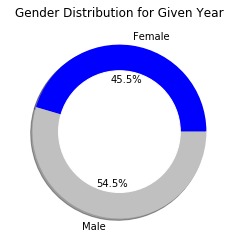

In [79]:
#DONUT M VS F

plt.pie(sr.Total, labels= ('Female','Male'), autopct = '%1.1f%%', colors=['blue','silver'], shadow= True)
p=plt.gcf()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.title('Gender Distribution for Given Year')
plt.show()